## Compute composites based on extreme PC months, for all forcing

In [1]:
import numpy as np
import scipy as sc
import xarray as xr
import matplotlib.pyplot as plt
from eofs.standard import Eof
import cartopy.crs as ccrs
import cartopy.crs as ccrs
import cartopy
import matplotlib as mpl
import scipy as sc
import cartopy.feature
import matplotlib.path as mpath
from cartopy import feature
import cmocean as cm
from cartopy.util import add_cyclic_point as cycpt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from sklearn.preprocessing import normalize
import datetime
import os
from matplotlib import rc
rc('text', usetex=True)
rc('xtick', labelsize=25) 
rc('ytick', labelsize=25) 
rc('axes', labelsize=25) 

Pick which composite

In [2]:
def ax_map(f, subploti = 1, subplotj = 1, subplotn = 1,latlim = -50,continent = "yes", fc = 'k'):
	ax = f.add_subplot(subploti,subplotj,subplotn,projection=ccrs.SouthPolarStereo(central_longitude=0.), fc = fc)
	ax.set_extent([-180, 180., -90., latlim], crs=ccrs.PlateCarree())
	if continent == "yes":
		ax.add_feature(feature.LAND, zorder=100, facecolor = "grey")
	theta = np.linspace(0, 2*np.pi, 100)
	center, radius = [0.5, 0.5], 0.5
	verts = np.vstack([np.sin(theta), np.cos(theta)]).T
	circle = mpath.Path(verts * radius + center)
	ax.set_boundary(circle, transform=ax.transAxes)
	return(ax)


In [3]:
v = xr.open_dataarray("/g/data/oz91/ma3822/ZW3/data/v_perturbation.nc")
slp = xr.open_dataarray("/g/data/oz91/ma3822/ZW3/data/slp_perturbation.nc")
perturbation_scaling = xr.open_dataarray("/g/data/oz91/ma3822/ZW3/data/perturbation_scaling.nc")
dsw_response = xr.open_dataarray("/g/data/oz91/ma3822/ZW3/data/dswf_year1_response.nc")
dsw_benchmark = xr.open_dataset("/g/data/oz91/ma3822/ZW3/data/dswf_benchmark.nc")

In [4]:

import cosima_cookbook as cc
import cosima_cookbook as cc

databases = ['/scratch/jk72/ma3822/access-om2/archive/01deg_jra55_9091ryf/01deg_jra55_9091ryf.db',
             '/g/data/oz91/ma3822/access-om2/archive/01deg_jra55_ryf_ZW3PC1Plus/ZW3PC1Plus.db',
             '/g/data/oz91/ma3822/access-om2/archive/01deg_jra55_ryf_ZW3PC1Minus/ZW3PC1Minus.db',
             '/scratch/jk72/ma3822/access-om2/archive/01deg_jra55_ryf_ZW3PC2Plus/ZW3PC2Plus.db',
             '/g/data/oz91/ma3822/access-om2/archive/01deg_jra55_ryf_ZW3PC2Minus/ZW3PC2Minus.db']


names = ['Neutral', 'PC1Plus', 'PC1Minus', 'PC2Plus', 'PC2Minus']


expts = ['01deg_jra55_9091ryf', '01deg_jra55_ryf_ZW3PC1Plus','01deg_jra55_ryf_ZW3PC1Minus','01deg_jra55_ryf_ZW3PC2Plus','01deg_jra55_ryf_ZW3PC2Minus']


sessions = [cc.database.create_session(database) for database in databases]

hu = cc.querying.getvar(expt=expts[0], variable='hu', 
                          session=sessions[0], frequency='static',
                          attrs={'cell_methods': 'time: point'}, n=1)
hu = hu.sel(yu_ocean = slice(-90,-50))



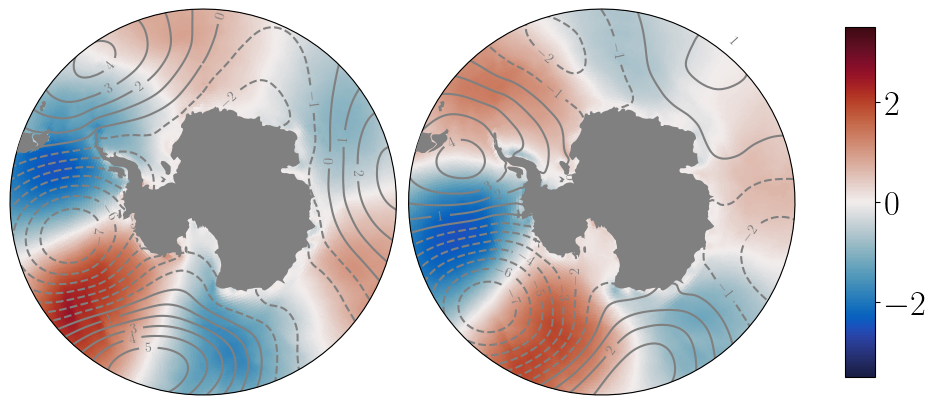

In [5]:
f = plt.figure(figsize = (10,5))
ax = ax_map(f,1,2,1,-50)
cs = ax.pcolormesh(v.longitude, v.latitude,v.sel(scenario ="PC1Plus").mean('month'), vmin = -3.5,vmax = 3.5, transform = ccrs.PlateCarree(), cmap = cm.cm.balance)
lab = ax.contour(v.longitude, v.latitude,slp.sel(scenario ="PC1Plus").mean('month')/100, levels = np.arange(-8,9,1), transform = ccrs.PlateCarree(), colors = ["grey"])
ax.clabel(lab, lab.levels, inline=True, fontsize=10)

ax = ax_map(f,1,2,2,-50)
cs = ax.pcolormesh(v.longitude, v.latitude,v.sel(scenario ="PC2Plus").mean('month'), vmin = -3.5,vmax = 3.5, transform = ccrs.PlateCarree(), cmap = cm.cm.balance)
lab = ax.contour(v.longitude, v.latitude,slp.sel(scenario ="PC2Plus").mean('month')/100, levels = np.arange(-8,9,1), transform = ccrs.PlateCarree(), colors = ["grey"])
ax.clabel(lab, lab.levels, inline=True, fontsize=10)
plt.tight_layout()
f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.85, 0.15, 0.03, 0.7])
f.colorbar(cs, cax=cbar_ax)


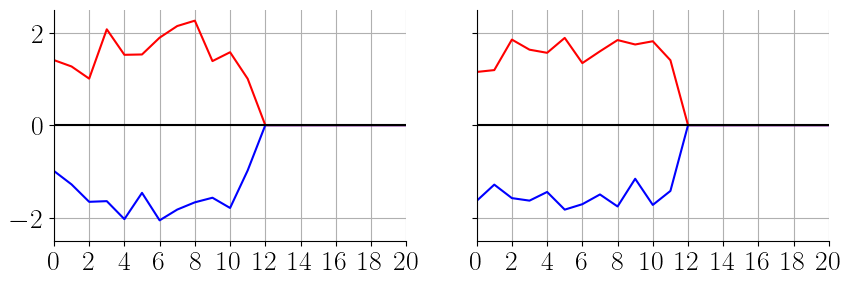

In [6]:
rc('text', usetex=True)
rc('xtick', labelsize=20) 
rc('ytick', labelsize=20) 
rc('axes', labelsize=20) 
f,axes = plt.subplots(1,2,figsize = (10,3), sharey = True)
ax = axes[0]
ax.plot(perturbation_scaling.sel(scenario = "PC1Plus"), color = "red", label = "PC1Plus")
ax.plot(perturbation_scaling.sel(scenario = "PC1Minus"), color = "blue", label = "PC1Minus")
ax.plot(perturbation_scaling.sel(scenario = "Neutral"), color = "k", label = "CONTROL")
ax.grid()
# ax.set_ylabel("ZW3 perturbation scaling")
# ax.set_xlabel("months")
# ax.legend()
ax.set_xlim(0,20)
ax.set_ylim(-2.5,2.5)
ax.set_xticks(np.arange(0,22,2))

for side in ['right','top']:
    ax.spines[side].set_visible(False)
# ax.arrow(15, -2.5, 0.1, 0, width=0.015, color="k", clip_on=False, head_width=0.12, head_length=0.12)

ax = axes[1]
ax.plot(perturbation_scaling.sel(scenario = "PC2Plus"), color = "red", label = "PC1Plus")
ax.plot(perturbation_scaling.sel(scenario = "PC2Minus"), color = "blue", label = "PC1Minus")
ax.plot(perturbation_scaling.sel(scenario = "Neutral"), color = "k", label = "CONTROL")
ax.grid()
# ax.set_xlabel("months")
# ax.legend()
ax.set_xlim(0,20)
ax.set_xticks(np.arange(0,22,2))
# removing the default axis on all sides:
for side in ['right','top']:
    ax.spines[side].set_visible(False)

In [10]:
u10_coarsened_plot = xr.open_dataarray("/g/data/oz91/ma3822/ZW3/data/u_perturbation_siplot.nc")
v10_coarsened_plot = xr.open_dataarray("/g/data/oz91/ma3822/ZW3/data/v_perturbation_siplot.nc")
regressed_sic_obs = xr.open_dataarray("/g/data/oz91/ma3822/ZW3/data/regressed_sic_obs.nc")
sim_iceconc = xr.open_dataarray("/g/data/oz91/ma3822/ZW3/data/sim_iceconc.nc")

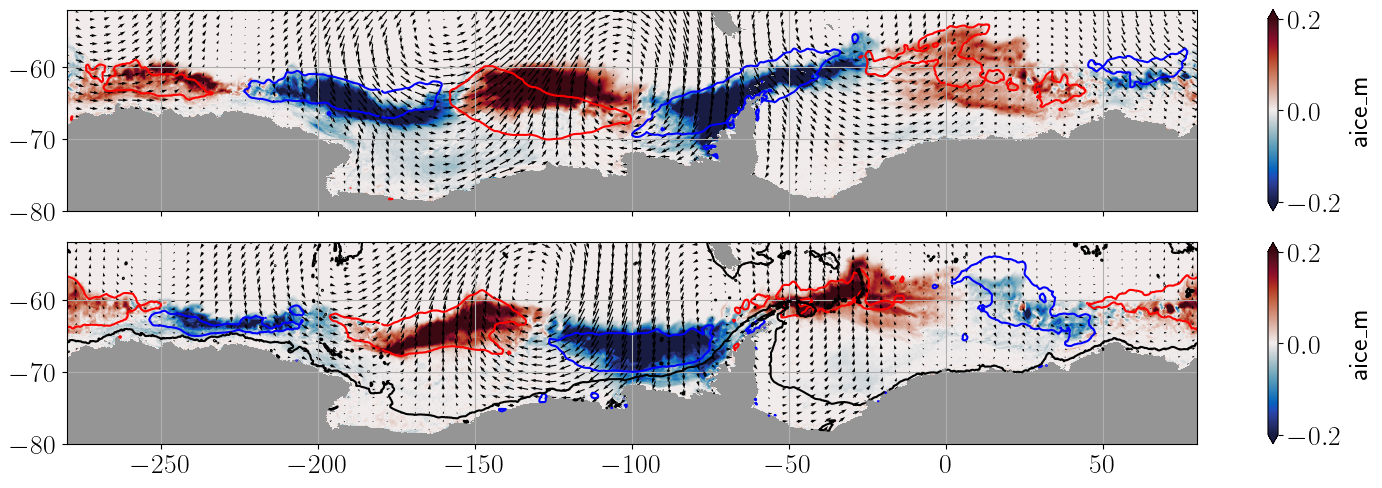

In [11]:
fig, axes = plt.subplots(2,1,figsize=(15,5), sharex = True)
Q = []

ax = axes[0]

(sim_iceconc.sel(scenario = "PC1Plus").isel(time = slice(4,8)).mean("time") - sim_iceconc.sel(scenario = "Neutral").isel(time = slice(4,8)).mean("time") ).plot(ax = ax, cmap = cm.cm.balance, vmin = -0.2, vmax = 0.2, add_colorbar = "False" )


cs = ax.contour(regressed_sic_obs.lon[:,:158], regressed_sic_obs.lat[:,:158],regressed_sic_obs.sel(pc = "pc1").isel(month = slice(5,9)).mean("month")[:,:158], levels = [-0.03,0.03], colors = ["b", "r"])
cs = ax.contour(regressed_sic_obs.lon[:,158:], regressed_sic_obs.lat[:,158:],regressed_sic_obs.sel(pc = "pc1").isel(month = slice(5,9)).mean("month")[:,158:], levels = [-0.03,0.03], colors = ["b", "r"])
cs = ax.contour(regressed_sic_obs.lon[:,:158]-360, regressed_sic_obs.lat[:,:158],regressed_sic_obs.sel(pc = "pc1").isel(month = slice(5,9)).mean("month")[:,:158], levels = [-0.03,0.03], colors = ["b", "r"])
cs = ax.contour(regressed_sic_obs.lon[:,158:]-360, regressed_sic_obs.lat[:,158:],regressed_sic_obs.sel(pc = "pc1").isel(month = slice(5,9 )).mean("month")[:,158:], levels =[-0.03,0.03], colors = ["b", "r"])

Q=ax.quiver(u10_coarsened_plot.longitude, u10_coarsened_plot.latitude, u10_coarsened_plot.sel(scenario = "PC1Plus"),v10_coarsened_plot.sel(scenario = "PC1Plus"),scale = 150,width = 0.001,headwidth = 3, headlength = 2,headaxislength = 2)
Q._init()
ax.quiver(u10_coarsened_plot.longitude-360, u10_coarsened_plot.latitude, u10_coarsened_plot.sel(scenario = "PC1Plus"),v10_coarsened_plot.sel(scenario = "PC1Plus"),scale = Q.scale, width = Q.width)
land = xr.where(np.isnan(hu.rename('land')), 1, np.nan)
land.plot(ax = ax,add_colorbar =False, cmap = "Greys")
ax.set_ylim(-80, -52)
ax.grid()
# plt.colorbar(cs, ax = ax)
# aice_ar[1][4:8].mean('time').plot.contour(ax = ax, levels = [0.1], colors = "r")
# aice_ar[0][4:8].mean('time').plot.contour(ax = ax, levels = [0.1], colors = "k")

# (regressed_sic_obs.sel(pc = 'pc1').isel(month = slice(4,8)).mean("month") - regressed_sic_obs.sel(pc = 'pc1').isel(month = slice(4,8)).mean("month")).plot.contour(ax =ax, levels = [-0.1,0.1], colors = ["b", "r"])
# (sim_iceconc.sel(scenario = "PC1Plus").isel(time = slice(4,8)).mean("time") - sim_iceconc.sel(scenario = "Neutral").isel(time = slice(4,8)).mean("time") ).plot.contour(ax =ax, levels = [-0.1,0.1], colors = ["b", "r"])


ax.set_xlabel(None)
ax.set_ylabel(None)



ax = axes[1]

(sim_iceconc.sel(scenario = "PC2Plus").isel(time = slice(4,8)).mean("time") - sim_iceconc.sel(scenario = "Neutral").isel(time = slice(4,8)).mean("time") ).plot(ax = ax, cmap = cm.cm.balance, vmin = -0.2, vmax = 0.2 , add_colorbar = "False" )


cs = ax.contour(regressed_sic_obs.lon[:,:158], regressed_sic_obs.lat[:,:158],regressed_sic_obs.sel(pc = "pc2").isel(month = slice(5,9)).mean("month")[:,:158], levels = [-0.03,0.03], colors = ["b", "r"])
cs = ax.contour(regressed_sic_obs.lon[:,158:], regressed_sic_obs.lat[:,158:],regressed_sic_obs.sel(pc = "pc2").isel(month = slice(5,9)).mean("month")[:,158:], levels = [-0.03,0.03], colors = ["b", "r"])
cs = ax.contour(regressed_sic_obs.lon[:,:158]-360, regressed_sic_obs.lat[:,:158],regressed_sic_obs.sel(pc = "pc2").isel(month = slice(5,9)).mean("month")[:,:158], levels = [-0.03,0.03], colors = ["b", "r"])
cs = ax.contour(regressed_sic_obs.lon[:,158:]-360, regressed_sic_obs.lat[:,158:],regressed_sic_obs.sel(pc = "pc2").isel(month = slice(5,9 )).mean("month")[:,158:], levels = [-0.03,0.03], colors = ["b", "r"])

ax.quiver(u10_coarsened_plot.longitude, u10_coarsened_plot.latitude, u10_coarsened_plot.sel(scenario = "PC2Plus"),v10_coarsened_plot.sel(scenario = "PC2Plus"),scale = Q.scale, width = Q.width)
ax.quiver(u10_coarsened_plot.longitude-360, u10_coarsened_plot.latitude, u10_coarsened_plot.sel(scenario = "PC2Plus"),v10_coarsened_plot.sel(scenario = "PC2Plus"),scale = Q.scale, width = Q.width)
land = xr.where(np.isnan(hu.rename('land')), 1, np.nan)
land.plot(ax = ax,add_colorbar =False, cmap = "Greys")
hu.plot.contour(ax = ax,levels = [1000], colors = 'k')
ax.grid()
# plt.colorbar(cs, ax = ax)
# aice_ar[3][4:8].mean('time').plot.contour(ax = ax, levels = [0], colors = "r")
# aice_ar[0][4:8].mean('time').plot.contour(ax = ax, levels = [0], colors = "k")

# (sim_iceconc.sel(scenario = "PC2Plus").isel(time = slice(4,7)).mean("time") - sim_iceconc.sel(scenario = "Neutral").isel(time = slice(4,7)).mean("time") ).plot.contour(ax =ax, levels = [-0.1,0.1], colors = ["b", "r"])


ax.set_xlabel(None)
ax.set_ylabel(None)

desired_length = 0.01  # plot units
actual_speed = desired_length * 150  # = 15 m/s
ax.set_ylim(-80, -52)



# qk = ax.quiverkey(Q, X=0.5, Y = -0.15, U=actual_speed, 
#                   label=f'{actual_speed} m/s', labelpos='E',fontproperties = {"size" : 20})    
plt.tight_layout()

In [13]:
v10_PC2plus = xr.open_dataset("/g/data/jk72/ma3822/data/ZW3_project/forcings/regressions/v2/PC2Plus/v_10/PC2plus_anom_v_10.nc")
u10_PC2plus = xr.open_dataset("/g/data/jk72/ma3822/data/ZW3_project/forcings/regressions/v2/PC2Plus/u_10/PC2plus_anom_u_10.nc")

v10_PC2minus = xr.open_dataset("/g/data/jk72/ma3822/data/ZW3_project/forcings/regressions/v2/PC2Minus/v_10/PC2minus_anom_v_10.nc")
u10_PC2minus = xr.open_dataset("/g/data/jk72/ma3822/data/ZW3_project/forcings/regressions/v2/PC2Minus/u_10/PC2minus_anom_u_10.nc")

v10_PC1plus = xr.open_dataset("/g/data/jk72/ma3822/data/ZW3_project/forcings/regressions/v2/PC1Plus/v_10/PC1plus_anom_v_10.nc")
u10_PC1plus = xr.open_dataset("/g/data/jk72/ma3822/data/ZW3_project/forcings/regressions/v2/PC1Plus/u_10/PC1plus_anom_u_10.nc")

v10_PC1minus = xr.open_dataset("/g/data/jk72/ma3822/data/ZW3_project/forcings/regressions/v2/PC1Minus/v_10/PC1minus_anom_v_10.nc")
u10_PC1minus = xr.open_dataset("/g/data/jk72/ma3822/data/ZW3_project/forcings/regressions/v2/PC1Minus/u_10/PC1minus_anom_u_10.nc")


v10_PC2plus_coarsened = v10_PC2plus.coarsen(longitude = 7, latitude = 5, boundary='trim').mean().mean("month")
v10_PC2minus_coarsened = v10_PC2minus.coarsen(longitude = 7, latitude = 5, boundary='trim').mean().mean("month")
u10_PC2plus_coarsened = u10_PC2plus.coarsen(longitude = 7, latitude = 5, boundary='trim').mean().mean("month")
u10_PC2minus_coarsened = u10_PC2minus.coarsen(longitude = 7, latitude = 5, boundary='trim').mean().mean("month")


v10_PC1plus_coarsened = v10_PC1plus.coarsen(longitude = 7, latitude = 4, boundary='trim').mean().mean("month")
v10_PC1minus_coarsened = v10_PC1minus.coarsen(longitude = 7, latitude = 4, boundary='trim').mean().mean("month")
u10_PC1plus_coarsened = u10_PC1plus.coarsen(longitude = 7, latitude = 4, boundary='trim').mean().mean("month")
u10_PC1minus_coarsened = u10_PC1minus.coarsen(longitude = 7, latitude = 4, boundary='trim').mean().mean("month")

u10_coarsened = [u10_PC1plus_coarsened,u10_PC1minus_coarsened,u10_PC2plus_coarsened,u10_PC2minus_coarsened]
v10_coarsened = [v10_PC1plus_coarsened,v10_PC1minus_coarsened,v10_PC2plus_coarsened,v10_PC2minus_coarsened]

u10_coarsened_plot = xr.concat(u10_coarsened, 'scenario').uas_10m
v10_coarsened_plot = xr.concat(v10_coarsened, 'scenario').vas_10m
u10_coarsened_plot["scenario"] = names[1:]
v10_coarsened_plot["scenario"] = names[1:]

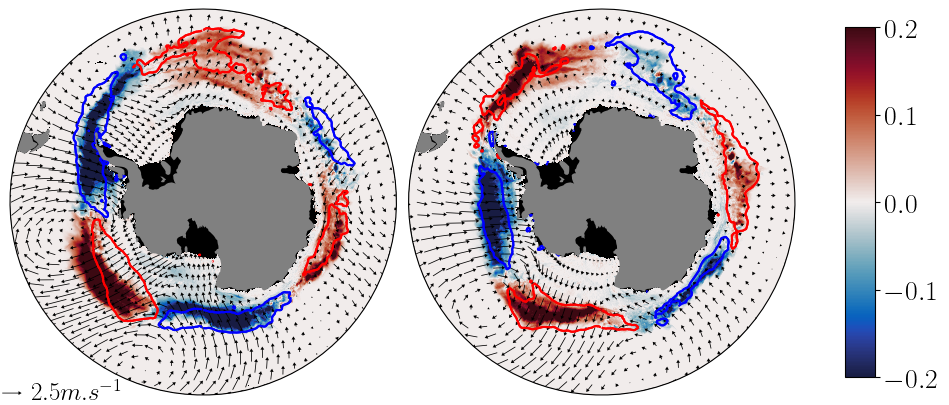

In [14]:
# fig, axes = plt.subplots(2,1,figsize=(15,5), sharex = True)
f = plt.figure(figsize = (10,5))
Q = []

ax = ax_map(f,1,2,1,-50)

(sim_iceconc.sel(scenario = "PC1Plus").isel(time = slice(4,8)).mean("time") - sim_iceconc.sel(scenario = "Neutral").isel(time = slice(4,8)).mean("time") ).plot(ax = ax, cmap = cm.cm.balance, vmin = -0.2, vmax = 0.2, add_colorbar = False, transform = ccrs.PlateCarree())


cs = ax.contour(regressed_sic_obs.lon[:,:158], regressed_sic_obs.lat[:,:158],regressed_sic_obs.sel(pc = "pc1").isel(month = slice(5,9)).mean("month")[:,:158], levels = [-0.03,0.03], colors = ["b", "r"], transform = ccrs.PlateCarree())
cs = ax.contour(regressed_sic_obs.lon[:,158:], regressed_sic_obs.lat[:,158:],regressed_sic_obs.sel(pc = "pc1").isel(month = slice(5,9)).mean("month")[:,158:], levels = [-0.03,0.03], colors = ["b", "r"], transform = ccrs.PlateCarree())
cs = ax.contour(regressed_sic_obs.lon[:,:158]-360, regressed_sic_obs.lat[:,:158],regressed_sic_obs.sel(pc = "pc1").isel(month = slice(5,9)).mean("month")[:,:158], levels = [-0.03,0.03], colors = ["b", "r"], transform = ccrs.PlateCarree())
cs = ax.contour(regressed_sic_obs.lon[:,158:]-360, regressed_sic_obs.lat[:,158:],regressed_sic_obs.sel(pc = "pc1").isel(month = slice(5,9 )).mean("month")[:,158:], levels =[-0.03,0.03], colors = ["b", "r"], transform = ccrs.PlateCarree())

Q=ax.quiver(u10_coarsened_plot.longitude.values, u10_coarsened_plot.latitude.values, u10_coarsened_plot.sel(scenario = "PC1Plus").values,v10_coarsened_plot.sel(scenario = "PC1Plus").values,scale = 50,width = 0.002,headwidth = 5, headlength = 4,headaxislength = 4, transform = ccrs.PlateCarree())
# # Q._init()
# # ax.quiver(u10_coarsened_plot.longitude-360, u10_coarsened_plot.latitude, u10_coarsened_plot.sel(scenario = "PC1Plus"),v10_coarsened_plot.sel(scenario = "PC1Plus"),scale = Q.scale, width = Q.width)
# land = xr.where(np.isnan(hu.rename('land')), 1, np.nan)
# land.plot(ax = ax,add_colorbar =False, cmap = "Greys", transform = ccrs.PlateCarree())
# ax.set_ylim(-80, -52)
# ax.grid()
# # plt.colorbar(cs, ax = ax)
# # aice_ar[1][4:8].mean('time').plot.contour(ax = ax, levels = [0.1], colors = "r")
# # aice_ar[0][4:8].mean('time').plot.contour(ax = ax, levels = [0.1], colors = "k")

# # (regressed_sic_obs.sel(pc = 'pc1').isel(month = slice(4,8)).mean("month") - regressed_sic_obs.sel(pc = 'pc1').isel(month = slice(4,8)).mean("month")).plot.contour(ax =ax, levels = [-0.1,0.1], colors = ["b", "r"])
# # (sim_iceconc.sel(scenario = "PC1Plus").isel(time = slice(4,8)).mean("time") - sim_iceconc.sel(scenario = "Neutral").isel(time = slice(4,8)).mean("time") ).plot.contour(ax =ax, levels = [-0.1,0.1], colors = ["b", "r"])


# ax.set_xlabel(None)
# ax.set_ylabel(None)



ax = ax_map(f,1,2,2,-50)

cs = (sim_iceconc.sel(scenario = "PC2Plus").isel(time = slice(4,8)).mean("time") - sim_iceconc.sel(scenario = "Neutral").isel(time = slice(4,8)).mean("time") ).plot(ax = ax, cmap = cm.cm.balance, vmin = -0.2, vmax = 0.2 , add_colorbar = False , transform = ccrs.PlateCarree())


ax.contour(regressed_sic_obs.lon[:,:158], regressed_sic_obs.lat[:,:158],regressed_sic_obs.sel(pc = "pc2").isel(month = slice(5,9)).mean("month")[:,:158], levels = [-0.03,0.03], colors = ["b", "r"], transform = ccrs.PlateCarree() )
ax.contour(regressed_sic_obs.lon[:,158:], regressed_sic_obs.lat[:,158:],regressed_sic_obs.sel(pc = "pc2").isel(month = slice(5,9)).mean("month")[:,158:], levels = [-0.03,0.03], colors = ["b", "r"], transform = ccrs.PlateCarree() )
ax.contour(regressed_sic_obs.lon[:,:158]-360, regressed_sic_obs.lat[:,:158],regressed_sic_obs.sel(pc = "pc2").isel(month = slice(5,9)).mean("month")[:,:158], levels = [-0.03,0.03], colors = ["b", "r"], transform = ccrs.PlateCarree() )
ax.contour(regressed_sic_obs.lon[:,158:]-360, regressed_sic_obs.lat[:,158:],regressed_sic_obs.sel(pc = "pc2").isel(month = slice(5,9 )).mean("month")[:,158:], levels = [-0.03,0.03], colors = ["b", "r"], transform = ccrs.PlateCarree() )
ax.quiver(u10_coarsened_plot.longitude.values, u10_coarsened_plot.latitude.values, u10_coarsened_plot.sel(scenario = "PC2Plus").values,v10_coarsened_plot.sel(scenario = "PC2Plus").values,scale = Q.scale,headwidth = 5, headlength = 4,headaxislength = 4, width = Q.width, transform = ccrs.PlateCarree() )
# ax.quiver(u10_coarsened_plot.longitude.values-360, u10_coarsened_plot.latitude.values, u10_coarsened_plot.sel(scenario = "PC2Plus").values,v10_coarsened_plot.sel(scenario = "PC2Plus").values,scale = Q.scale,headwidth = 5, headlength = 4,headaxislength = 4, width = Q.width, transform = ccrs.PlateCarree() )
plt.tight_layout()
f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.85, 0.15, 0.03, 0.7])
f.colorbar(cs, cax=cbar_ax)

# land = xr.where(np.isnan(hu.rename('land')), 1, np.nan)
# land.plot(ax = ax,add_colorbar =False, cmap = "Greys")
# hu.plot.contour(ax = ax,levels = [1000], colors = 'k')
# ax.grid()
# # plt.colorbar(cs, ax = ax)
# # aice_ar[3][4:8].mean('time').plot.contour(ax = ax, levels = [0], colors = "r")
# # aice_ar[0][4:8].mean('time').plot.contour(ax = ax, levels = [0], colors = "k")

# # (sim_iceconc.sel(scenario = "PC2Plus").isel(time = slice(4,7)).mean("time") - sim_iceconc.sel(scenario = "Neutral").isel(time = slice(4,7)).mean("time") ).plot.contour(ax =ax, levels = [-0.1,0.1], colors = ["b", "r"])


# ax.set_xlabel(None)
# ax.set_ylabel(None)

# desired_length = 0.01  # plot units
# actual_speed = desired_length * 150  # = 15 m/s
# ax.set_ylim(-80, -52)



# # qk = ax.quiverkey(Q, X=0.5, Y = -0.15, U=actual_speed, 
# #                   label=f'{actual_speed} m/s', labelpos='E',fontproperties = {"size" : 20})    
# plt.tight_layout()

# Create quiver key using the correct quiver object
desired_length = 0.05  # plot units
actual_speed = desired_length * Q.scale  # Use Q2's scale since that's where the key is placed

qk = ax.quiverkey(Q,  X=0.03, Y=0.005, U=actual_speed, 
                   label=r'$%s m.s^{-1}$' %actual_speed, labelpos='E', fontproperties = {"size" : 18})
